In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [3]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [4]:
class Request:
    def __init__(self, line):
        # TODO DO PARSING HERE
        parsed1 = line.split()
        self.ip = parsed1[0]
        date = parsed1[1][13:21].split(":")
        for i in range(0, len(date)):
            date[i] = int(date[i])
        # convert hours + minutes + seconds -> total number of seconds
        self.time = date[0]*3600 + date[1]*60 + date[2]
        self.page = parsed1[4]
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [5]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 

156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

3.1 The number of sessions:  1000
3.2 The number of users:  391
3.3 The average number of sessions per one user:  2.56
3.4 The distribution of the sessions' lengths (minutes):


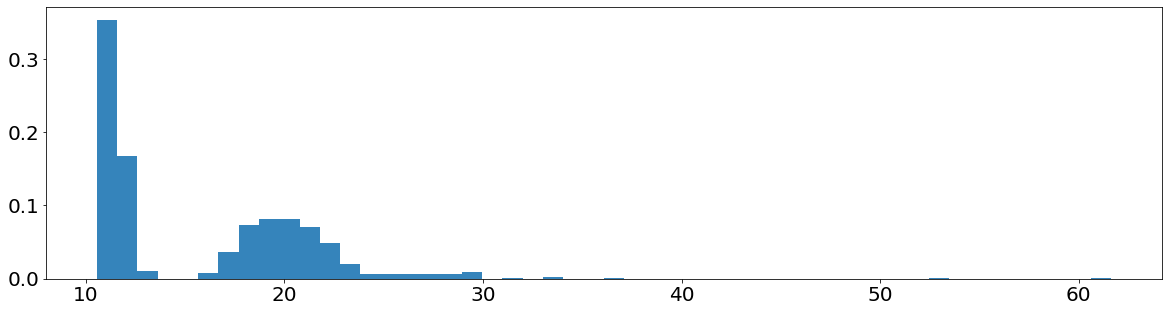

3.5 Use the distribution plot to visualize the sessions' lengths (the number of requests):


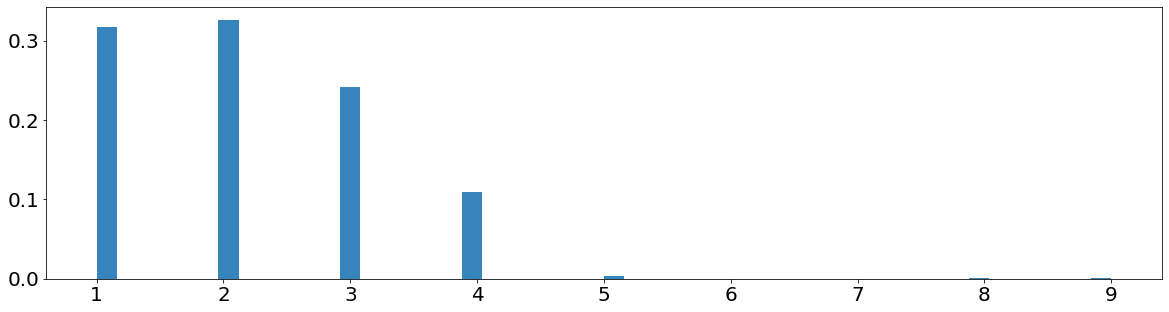

3.6 Use the distribution plot to visualize sessions' starting times (hours):


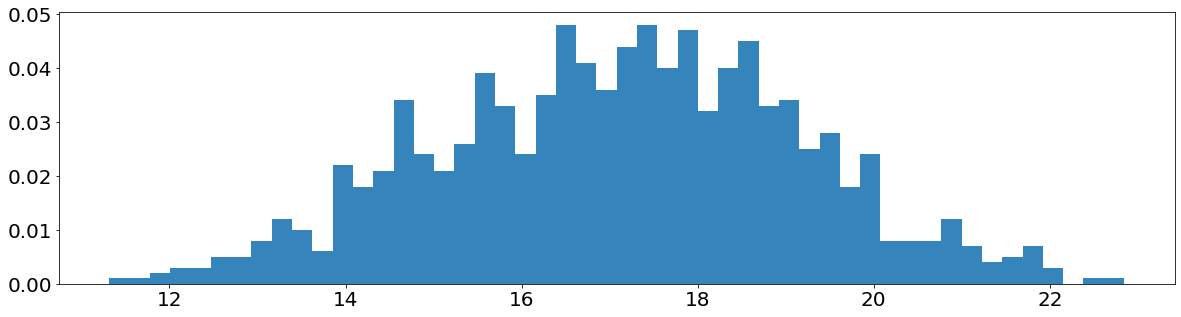

3.7  For each page plot the number of times it has been an entry page:


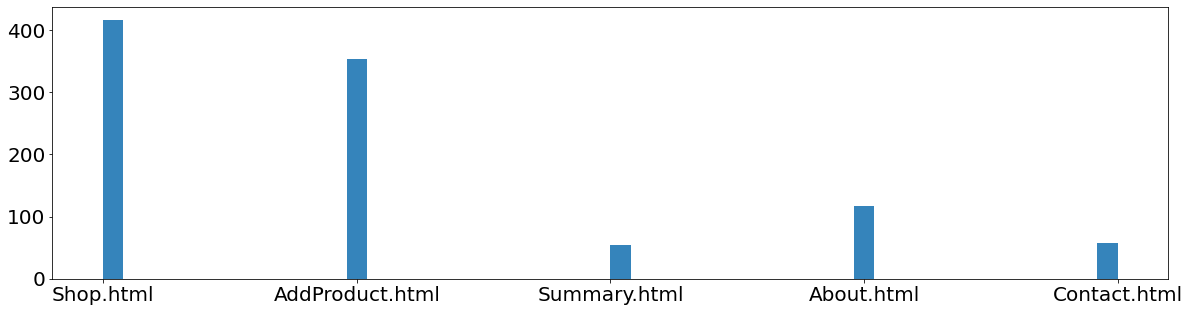

3.8 For each page plot the number of times the user stopped a session while being on this page:


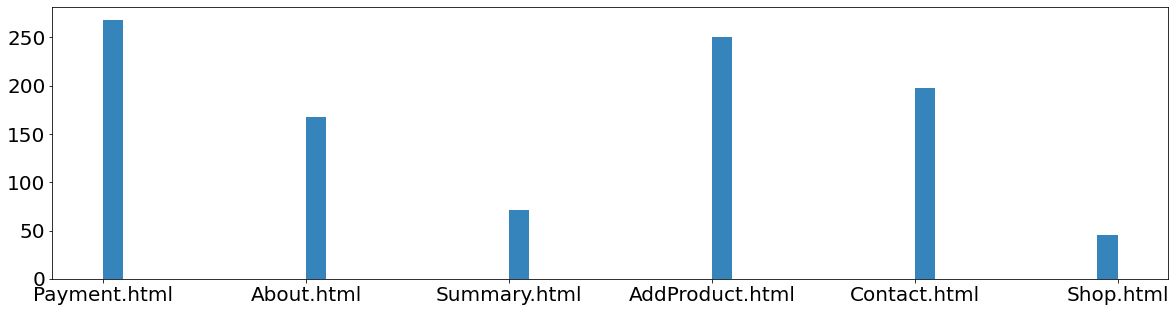

3.9 For each page plot the average time the user stayed on this page:


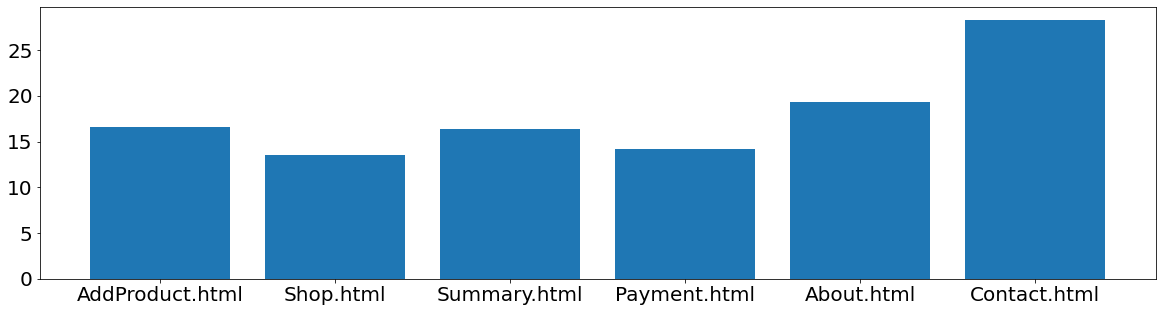

3.10 Print the fist 10 sessions (paths):
['Shop.html', 'AddProduct.html', 'Summary.html', 'Payment.html']
['AddProduct.html', 'About.html']
['AddProduct.html', 'Summary.html']
['Shop.html', 'AddProduct.html', 'Summary.html', 'Payment.html']
['AddProduct.html', 'Summary.html', 'Payment.html']
['Shop.html', 'AddProduct.html', 'Summary.html', 'Payment.html']
['Shop.html', 'AddProduct.html']
['Summary.html', 'Payment.html']
['AddProduct.html', 'Summary.html', 'Payment.html']
['Shop.html', 'About.html']


In [220]:
class Session:
    def __init__(self,starting_time,stop_time,requests,threshold):
        self.starting_time = starting_time
        self.start_timehour = starting_time/3600.0
        self.stop_time = stop_time
        self.requests = requests
        self.req_len = len(requests)
        self.session_len = (stop_time - starting_time + threshold)/60.0
        self.session_len_sec = (stop_time - starting_time + threshold)/3600.0
        self.entry_page = requests[0].page
        self.departure_page = requests[-1].page
        
    def __repr__(self):
        print("SESSION")
        print(self.starting_time)
        print(self.stop_time)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self, ip, sessions):
        self.ip = ip
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]


i_p = []
users = {}
sessions = []

for line in lines:
    x = line.split()
    if x[0] not in i_p:
        i_p.append(x[0])

for req in reqs:
    r = str(req).split()
    if r[0] in users:
        users[r[0]].append(req)
    if r[0] not in users:
        users[r[0]] = []
    
threshold = 633
for i in i_p:
    counter = 1
    starting_time = -1
    requests = []
    for j in users[i]:
        if starting_time == -1:
            starting_time = j.time
        requests.append(j)
        try:
            key = users[i][counter]
            if key.time - j.time >= threshold:
                sessions.append(Session(starting_time,j.time,requests,threshold))
                starting_time = key.time
                requests = []
        except:
            sessions.append(Session(starting_time,j.time,requests,threshold))
        counter += 1
    starting_time = -1
    paths = requests
    requests = []

print("3.1 The number of sessions: ", len(sessions))
print("3.2 The number of users: ", len(i_p))
print("3.3 The average number of sessions per one user: ", round(len(sessions)/len(i_p),2))

print("3.4 The distribution of the sessions' lengths (minutes):")

weights = np.ones_like(sessions)/float(len(sessions))
count, bins, ignored = plt.hist([i.session_len for i in sessions], 50, alpha=0.9, weights=weights)
plt.show()

print("3.5 Use the distribution plot to visualize the sessions' lengths (the number of requests):")
count, bins, ignored = plt.hist([i.req_len for i in sessions], 50, alpha=0.9, weights=weights)
plt.show()

print("3.6 Use the distribution plot to visualize sessions' starting times (hours):")
count, bins, ignored = plt.hist([i.start_timehour for i in sessions], 50, alpha=0.9, weights=weights)
plt.show()

print("3.7  For each page plot the number of times it has been an entry page:")
count, bins, ignored = plt.hist([i.entry_page for i in sessions], 50, alpha=0.9)
plt.show()

print("3.8 For each page plot the number of times the user stopped a session while being on this page:")
count, bins, ignored = plt.hist([i.departure_page for i in sessions], 50, alpha=0.9)
plt.show()

print("3.9 For each page plot the average time the user stayed on this page:")

b =([i.page for i in reqs])
a =([i.time for i in reqs])
c =([i.time for i in reqs])
c.pop(0)
c.append(a[-1]+threshold)
e=[]
for i in range(len(a)):
    e.append(c[i]-a[i])
time_name_tuple = zip(e,b)

from collections import OrderedDict

t = OrderedDict()
for variables, names in time_name_tuple:
    t.setdefault(names, []).append(variables)
t = [(sum(v) / len(v), k) for k, v in t.items()]
d = dict(t)
plt.bar(range(len(d)), list(d.keys()), align='center')
plt.xticks(range(len(d)), list(d.values()))
plt.show()

print("3.10 Print the fist 10 sessions (paths):")

for i in range(10):
    print([j.page for j in sessions[i].requests])